In [3]:
% matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

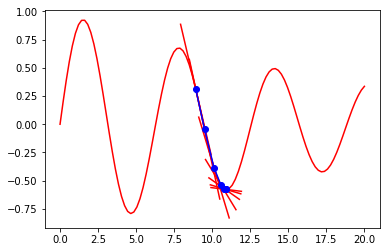

In [47]:
# p: 初期位置
p = 8.5
#  r: 学習率
r = 1
# e: 許容誤差
e = 0.02

def f_cost(w):
    """
    コスト関数
    w: 入力値
    """
    # y = x * x
#     cost = np.power(w, 2)
    #  converged sin
    cost = np.sin(w) * np.exp(-0.05 * w)
    return cost

def differential(w):
    """
    コスト関数の結果（微分）を返す
    w: 入力値
    """
     # y = x * x
#     ret = 2 * w
    #  converged sin
    ret = (-0.05 * np.exp(-0.05 * w) * np.sin(w)) + (np.exp(-0.05 * w) * np.cos(w))
    return ret

def tangent(c_f, d_f, w, x):
    """
    接線の方程式にxの値をかける
    c_f: 高階関数(コスト関数)
    d_f: 高階関数(コスト関数の微分)
    w: 接線のx座標値
    x: 接線の端のx座標
    """
    return d_f(w) * (x - w) + c_f(w)

def output(c_f, d_f, t_f, p, r, e, loop_max = 10000):
    """
    グラフ出力
    c_f: 高階関数(コスト関数)
    d_f: 高階関数(コスト関数の微分)
    p: 初期位置
    r: 学習率
    e: 許容誤差
    loop_max: 最大ループ回数
    """
    x = np.linspace(0, 20, 100)
    y = c_f(x)
    x_p = np.array([])
    y_p = np.array([])
    t_p = []
    i = 1
    while True:
        w = np.abs(d_f(p))
        if w < e:
            break
        else:
            p = p - r * d_f(p)
            x_p = np.append(x_p, p)
            y_p = np.append(y_p, c_f(p))
            plt.plot([p - 1, p + 1], [t_f(c_f, d_f, p, p - 1), t_f(c_f, d_f, p, p + 1)], 'r-')
        i = i + 1
        if i > loop_max:
            break
    plt.plot(x, y, 'r-', x_p, y_p, 'bo-')
    plt.show()

output(f_cost, differential, tangent, p, r, e)